<a href="https://colab.research.google.com/github/sree-hitha/sreehitha/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Displays all essential insights:

Basic information and summaries.

Course suggestions based on question keywords.

Free vs. paid course counts.

Course duration by level.

Course recommendation matching Q&A contextually.



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Questions and Answers Sample:
                                             Question  \
0           Who provides courses on machine learning   
1   How long does it take to learn machine learning?   
2  How long does it take to learn supervised lear...   
3  Are there free resources to learn machine lear...   
4  Are there free resources to learn machine lear...   

                                              Answer  
0  Google Developers provides Free courses such a...  
1  Free Beginner courses generally have a duratio...  
2  Free Beginner courses generally have a duratio...  
3  Free courses suitable for Beginner generally h...  
4  Free courses suitable for Intermediate general...   

Courses Sample:
   Module_Code                    Course_Learning_Material             Source  \
0     CLMML00            Introduction to Machine Learning  Google Develope

<ipython-input-3-1777046329>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=courses, x='Type_Free_Paid', palette='Set2')


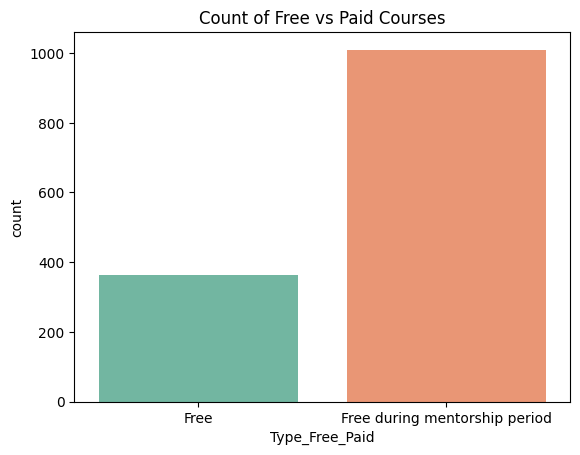

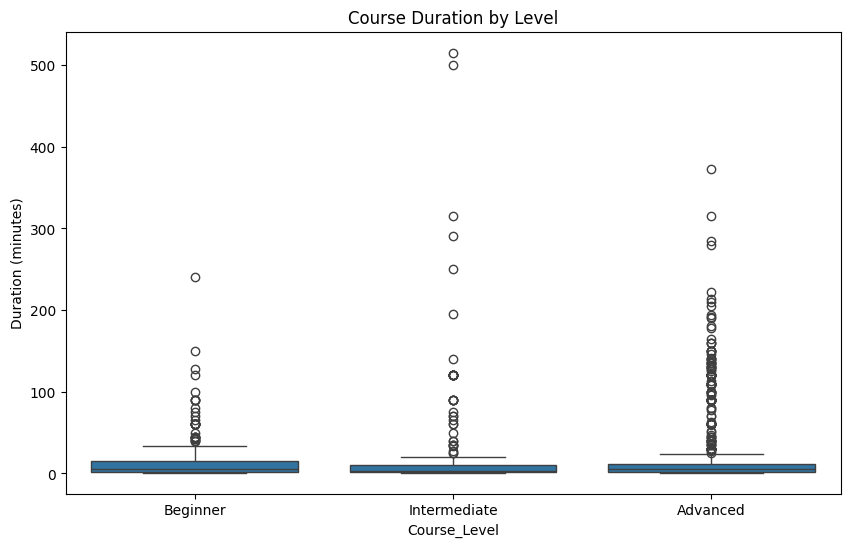

Streaming output truncated to the last 5000 lines.
                         {'Course_Learning_Material': 'AI Ethics Resources',
                          'Course_Level': 'Intermediate',
                          'Duration': '1.0 minutes',
                          'Links': 'https://www.ibm.com/topics/ai-ethics#Related+solutions',
                          'Type_Free_Paid': 'Free'},
                         {'Course_Learning_Material': 'AI Ethics Resources',
                          'Course_Level': 'Intermediate',
                          'Duration': '1.0 minutes',
                          'Links': 'https://www.ibm.com/topics/ai-ethics#Take+the+next+step%0A',
                          'Type_Free_Paid': 'Free'},
                         {'Course_Learning_Material': 'Fast.ai',
                          'Course_Level': 'Advanced',
                          'Duration': '40.0 hours',
                          'Links': 'Practical Deep Learning',
                          'Type_Free_Paid': 

In [ ]:
# Mount Google Drive (use in Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets (replace path if needed)
ques_ans = pd.read_csv('/content/drive/MyDrive/infotact project 2/data sets/ques_ans.csv')
courses = pd.read_csv('/content/drive/MyDrive/infotact project 2/data sets/courses.csv')

# Display first few rows of both datasets
print("Questions and Answers Sample:\n", ques_ans.head(), "\n")
print("Courses Sample:\n", courses.head(), "\n")

# Dataset info
print("Q&A Dataset Info:")
print(ques_ans.info(), "\n")

print("Courses Dataset Info:")
print(courses.info(), "\n")

# Check for nulls
print("Missing values in ques_ans:\n", ques_ans.isnull().sum())
print("Missing values in courses:\n", courses.isnull().sum())

# Unique course sources
print("\nUnique Course Sources:\n", courses['Source'].unique())

# Count Free vs Paid
sns.countplot(data=courses, x='Type_Free_Paid', palette='Set2')
plt.title('Count of Free vs Paid Courses')
plt.show()

# Duration distribution by Course Level
plt.figure(figsize=(10,6))
sns.boxplot(data=courses, x='Course_Level', y=courses['Duration'].str.extract('(\d+)').astype(float)[0])
plt.title('Course Duration by Level')
plt.ylabel('Duration (minutes)')
plt.show()

# Match questions to course topics using keywords
def find_matching_courses(question, courses_df):
    keywords = question.lower().split()
    matched = courses_df[courses_df['Keywords_Tags_Skills_Interests_Categories']
                         .str.lower()
                         .apply(lambda x: any(k in x for k in keywords))]
    return matched[['Course_Learning_Material', 'Course_Level', 'Type_Free_Paid', 'Duration', 'Links']]

# Test matching on a sample question
sample_q = ques_ans.iloc[0]['Question']
print(f"\nSample Question: {sample_q}")
print("Matching Courses:\n", find_matching_courses(sample_q, courses))

# Merge question-answer with recommended course (optional extended analysis)
def map_questions_to_courses(qa_df, course_df):
    results = []
    for idx, row in qa_df.iterrows():
        question = row['Question']
        answer = row['Answer']
        matched = find_matching_courses(question, course_df)
        results.append({
            "Question": question,
            "Answer": answer,
            "Recommended_Courses": matched.to_dict('records')
        })
    return results

recommendations = map_questions_to_courses(ques_ans, courses)

# Example output for first Q&A
import pprint
pprint.pprint(recommendations[0])


In [ ]:
from google.colab import drive
drive.mount('/content/drive')